In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('Bitcoin Historical Data - Investing.com India (1).csv', date_parser = True)
data.tail()
data.dropna(inplace = True)

In [3]:
data.tail()

,Date,Price,Open,High,Low,Vol.,Change %
26,"Dec 04, 2021","49,195.2","53,620.7","53,847.2","42,587.8",168.00K,-8.27%
27,"Dec 03, 2021","53,631.5","56,495.2","57,543.6","52,008.9",89.20K,-5.07%
28,"Dec 02, 2021","56,496.0","57,207.8","57,377.5","55,807.9",54.94K,-1.25%
29,"Dec 01, 2021","57,210.3","56,891.7","59,064.3","56,496.5",66.75K,0.58%
30,"Nov 30, 2021","56,882.9","57,795.2","59,174.4","55,936.9",73.66K,-1.58%


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      31 non-null     object
 1   Price     31 non-null     object
 2   Open      31 non-null     object
 3   High      31 non-null     object
 4   Low       31 non-null     object
 5   Vol.      31 non-null     object
 6   Change %  31 non-null     object
dtypes: object(7)
memory usage: 1.9+ KB


In [6]:
data.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,31,31,31,31,31,31,31
unique,31,31,31,31,31,31,31
top,"Dec 30, 2021","47,678.4","46,470.7","47,730.8","46,003.0",65.84K,2.62%
freq,1,1,1,1,1,1,1


In [7]:
data.shape

(31, 7)

In [8]:
data

,Date,Price,Open,High,Low,Vol.,Change %
0,"Dec 30, 2021","47,678.4","46,470.7","47,730.8","46,003.0",65.84K,2.62%
1,"Dec 29, 2021","46,461.7","47,548.4","48,121.7","46,127.8",63.92K,-2.28%
2,"Dec 28, 2021","47,545.2","50,703.4","50,703.8","47,345.7",74.39K,-6.18%
3,"Dec 27, 2021","50,678.2","50,783.6","52,016.3","50,459.0",43.90K,-0.20%
4,"Dec 26, 2021","50,779.9","50,404.0","51,247.0","49,527.0",32.34K,0.74%
5,"Dec 25, 2021","50,406.4","50,789.6","51,140.2","50,196.8",26.67K,-0.75%
6,"Dec 24, 2021","50,786.1","50,807.4","51,795.3","50,428.4",45.97K,-0.03%
7,"Dec 23, 2021","50,801.0","48,599.6","51,355.6","48,053.4",56.24K,4.53%
8,"Dec 22, 2021","48,599.7","48,898.7","49,540.3","48,449.7",40.89K,-0.62%
9,"Dec 21, 2021","48,902.0","46,900.1","49,306.1","46,654.0",57.88K,4.28%


In [9]:
def to_value(data):
    data = data[:-1]
    return data

def comma_remove(data):
    data=data.replace(',','')
    return data

In [10]:
data['Open'] = data['Open'].apply(comma_remove)
data['Price'] = data['Price'].apply(comma_remove)
data['High'] = data['High'].apply(comma_remove)
data['Low'] = data['Low'].apply(comma_remove)

In [11]:
data.drop(['Date','Vol.','Change %'],1,inplace = True)

C:\Users\User\AppData\Local\Temp/ipykernel_17624/3773487047.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data.drop(['Date','Vol.','Change %'],1,inplace = True)


In [12]:
for i in data.columns.to_list():
    data[i]  = data[i].astype('float')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   31 non-null     float64
 1   Open    31 non-null     float64
 2   High    31 non-null     float64
 3   Low     31 non-null     float64
dtypes: float64(4)
memory usage: 1.2 KB


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   31 non-null     float64
 1   Open    31 non-null     float64
 2   High    31 non-null     float64
 3   Low     31 non-null     float64
dtypes: float64(4)
memory usage: 1.2 KB


In [15]:
training_data = data[['Open','Price','High','Low']]
training_data.head()

,Open,Price,High,Low
0,46470.7,47678.4,47730.8,46003.0
1,47548.4,46461.7,48121.7,46127.8
2,50703.4,47545.2,50703.8,47345.7
3,50783.6,50678.2,52016.3,50459.0
4,50404.0,50779.9,51247.0,49527.0


In [16]:
import matplotlib.pyplot as plt

C:\Users\User\Anaconda3\envs\eco\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


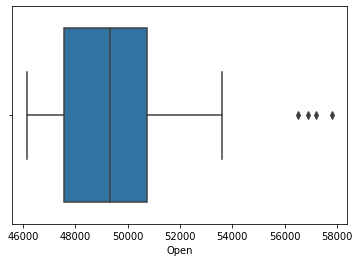

C:\Users\User\Anaconda3\envs\eco\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


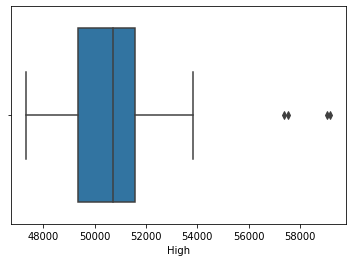

C:\Users\User\Anaconda3\envs\eco\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


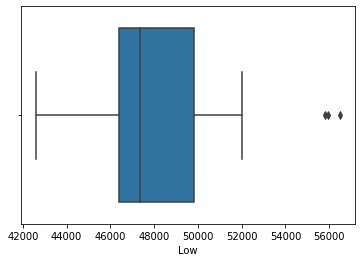

C:\Users\User\Anaconda3\envs\eco\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


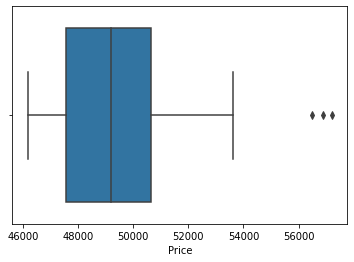

In [17]:
for i in ['Open','High','Low','Price']:
    sns.boxplot(data[i])
    plt.show()

<AxesSubplot:>

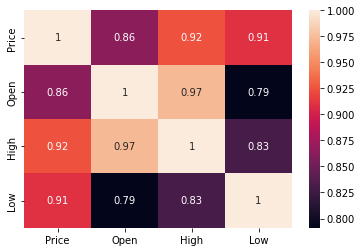

In [18]:
sns.heatmap(data.corr().round(7), annot=True)

In [19]:
X_train, X_test, Y_train, Y_test = tts(training_data, data['Price'],train_size = 85/100,shuffle =False,random_state = 0 )

In [20]:
Y_test.shape

(5,)

In [21]:
from sklearn.linear_model import LinearRegression 

lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [22]:
mean_squared_error(lr.predict(X_train), Y_train)

4.886728541851733e-23

In [23]:
mean_squared_error(lr.predict(X_test), Y_test)

3.176373552203626e-23

#building svm

In [24]:
from sklearn.svm import SVR

In [25]:
sv = SVR(C = 0.001,kernel = 'linear')
sv.fit(X_train,Y_train)


SVR(C=0.001, kernel='linear')

In [26]:
sv.predict(X_test)

array([49203.69942698, 53633.40374618, 56495.68046301, 57209.83939606,
       56883.1773339 ])

In [27]:
mean_squared_error(sv.predict(X_train), Y_train)

0.7141086849404257

In [28]:
mean_squared_error(sv.predict(X_test), Y_test)

15.251136478559985